In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from pathlib import Path
import scipy.io
import py_pcha
import os
import pandas as pd

import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn import preprocessing
from pathlib import Path
import scipy.io
import py_pcha

In [2]:
data_paths = os.listdir('Faces')

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

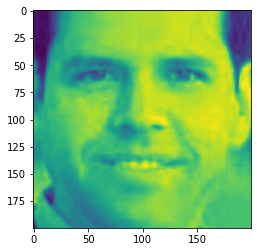

In [4]:
img=plt.imread('Faces/'+data_paths[0])[:,:,0]
plt.imshow(img)

In [5]:
img.shape

(200, 200)

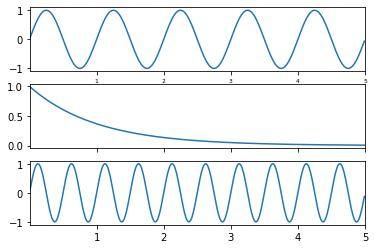

In [18]:
t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = np.sin(4 * np.pi * t)

ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.tick_params('x', labelsize=6)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.tick_params('x', labelbottom=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.xlim(0.01, 5.0)
plt.show()

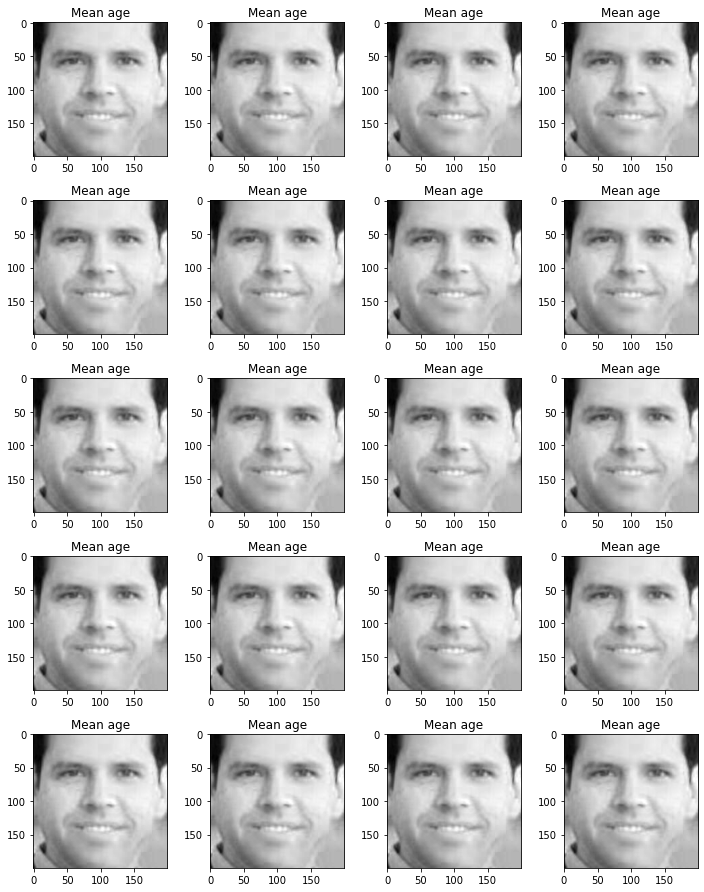

In [27]:
idx=1
plt.figure(figsize=(10,12.5))
for cat in range(0,5):
        for i in range(0,4):
            plt.subplot(5,4,idx)
            idx+=1
            plt.title("Mean age")
            plt.imshow(img,cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
idx=1
plt.figure(figsize=(16,9))
for cat in range(0,5):
    subset=X[categories==cat]
    [pca_s,S,age_s]=PCA_per_category_ellipse(cat,plot=False)
    [pred,_,_]=run_Kmeans(pca_s,S,clusters=4,plot=False)
    for i in range(0,4):
        plt.subplot(5,4,idx)
        idx+=1
        # mean age:
        mean_age=np.mean(age_s[pred==i])
        max_age=max(age_s[pred==i])
        min_age=min(age_s[pred==i])
        subs_0=subset[pred==i]
        mean_img_0=np.mean(subs_0,axis=0)
        plt.title("Mean age: %d"%mean_age)
        plt.imshow(mean_img_0.reshape(200,200),cmap='gray')
plt.tight_layout()
plt.savefig('men.png')
plt.show()